# First steps of handeling NetCDF Data in Phyton

The aim of this short tutorial is to explain the first steps to get familiar with NetCDF data using the $\textit{xarray}$ package in Python. It also includes some first steps to process and visualise the data. This can be the starting point to create some figures similar to those found in the IPCC report:

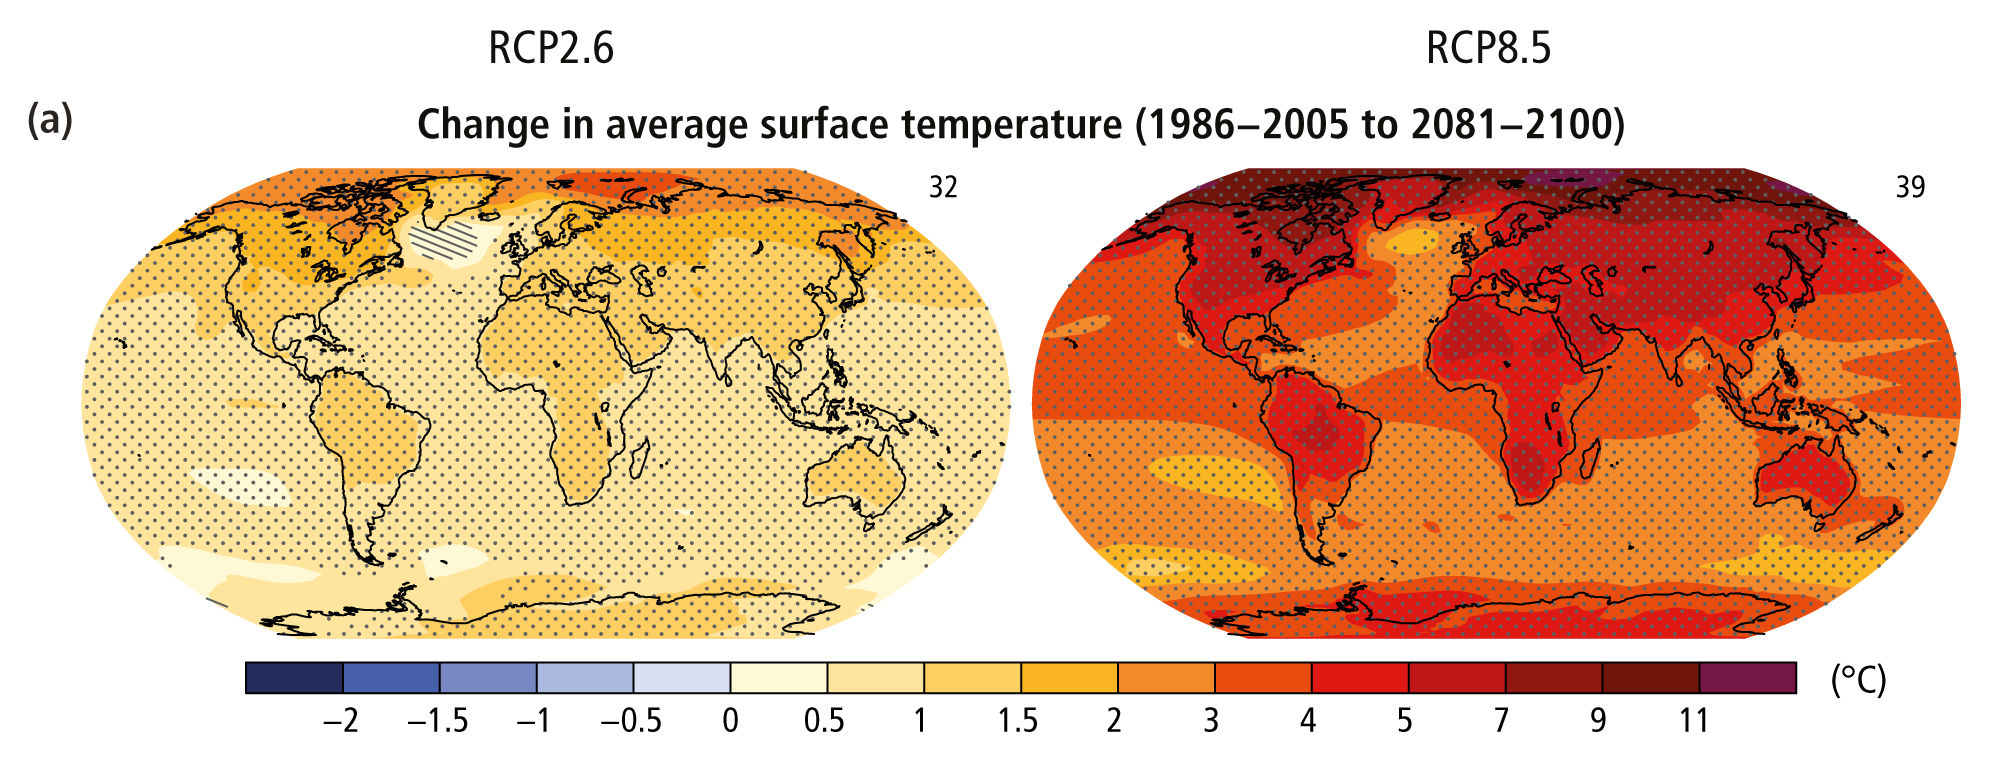

### Github Link

### Importing the requrired packages 

In [ ]:
'''
This imports the needed package dependencies, if the packages are not yet installed just remove the # above in
order to install the same version than used in this example
'''

#pip install xarray == 2023.10.1
import xarray as xr

#pip install numpy == 1.22.0
import numpy as np

#pip install cartopy == 0.22.0
import cartopy 

#pip install xarray == 3.5.1
import matplotlib 
import matplotlib.pyplot as plt

In [ ]:
print(xr.__version__)
print(np.__version__)
print(cartopy.__version__)
print(matplotlib.__version__)

### Loading the data

In [ ]:
#Load in some Data
filename_ssp585_1='Data/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc'
filename_ssp585_2='Data/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc'

### Combining and processing the data

In [ ]:
# Combine the two datasets to get one dataset from 2015 to 2100
historical=xr.open_mfdataset(paths=[filename_ssp585_1,filename_ssp585_2],combine='by_coords')

#get a first insight of what is in the dataset
historical

In [ ]:
#get some more information about the value we are interested in (tas = Near-Surface Air Temperature)
historical.tas

In [ ]:
#Convert the data from Kelvin to Celcius, don't forget to update the corresponding attribute too
tas_historical_C = historical.tas - 273.15
tas_historical_C.attrs = historical.tas.attrs
tas_historical_C.attrs.update(units='C')
tas_historical_C.compute()

In [ ]:
#Select the time period of interest
tas_historical_C_2020_2030 = tas_historical_C.sel(time=slice('2020', '2030'))
tas_historical_C_2090_2100 = tas_historical_C.sel(time=slice('2090', '2100'))

tas_historical_C_2020_2030

In [ ]:
#Get the mean value for these time periods
tas_historical_C_2020_2030_mean = tas_historical_C_2020_2030.mean(dim="time")
tas_historical_C_2090_2100_mean = tas_historical_C_2090_2100.mean(dim="time")

In [ ]:
#Calculate the difference between these time periods
diff_tas_historical_C_2100_2020 = tas_historical_C_2090_2100_mean - tas_historical_C_2020_2030_mean

### Plotting the data

In [ ]:
#First attempt of plotting the data
diff_tas_historical_C_2100_2020.plot()

In [ ]:
#More sophisiticated attempt to plot the data

#define the layout
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (12,5), subplot_kw = {"projection": cartopy.crs.PlateCarree()})

#define what should be visualised
elev_kwargs = {"cmap" : "hot_r",
               "vmin" : 0, 
               "vmax" : 12}
diff_tas_historical_C_2100_2020.plot(ax = ax, **elev_kwargs)

#Update the plot
ax.gridlines() #add a grid
ax.coastlines() #add costlines
ax.add_feature(cartopy.feature.BORDERS) #add boarders of the nations

In [ ]:
#Some adjustements to make the figure a bit more visual appealing
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (12,5), subplot_kw = {"projection": cartopy.crs.PlateCarree()})


elev_kwargs = {"cmap" : "hot_r",
               "vmin" : 0, 
               "vmax" : 20}
diff_tas_historical_C_2100_2020.plot(ax = ax, **elev_kwargs,cbar_kwargs={"label": "Near-Surface Air Temperature [C]",'orientation':'vertical','shrink':0.95},robust=False,extend='both')

#Updating the map
gls = ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', alpha=0.2, draw_labels=True)
ax.coastlines(resolution='110m',linewidth=0.7)
ax.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.7, ls = "--") #
ax.set_title("Change in mean Air Temperature 1.5m SSP585 (2020-2030 to 2090-2100)",fontsize='14')
gls.top_labels=False
gls.right_labels=False

#Over representation comes from cloud forcing and resulting high climate sensibility, could be that we underestimated the warming so not sure if it is bad

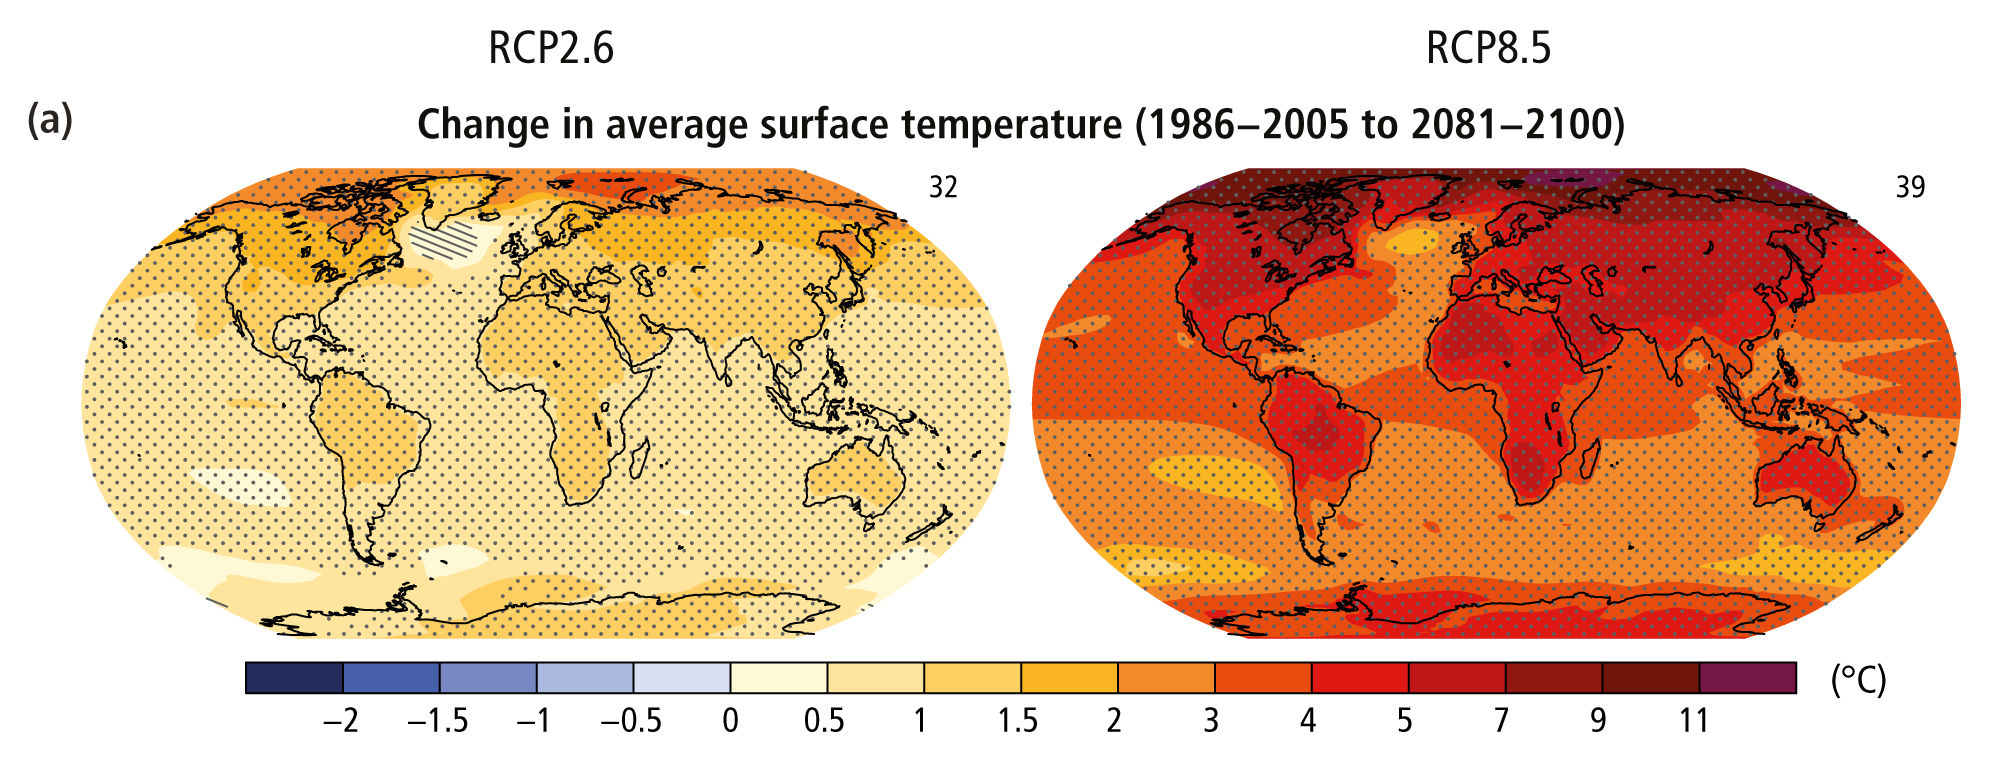